In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

*Used Dataset url*

https://www.kaggle.com/datasets/kartik2112/fraud-detection

In [2]:
df_train = pd.read_csv('fraudTrain.csv', index_col=0)
df_test = pd.read_csv('fraudTest.csv', index_col=0)

In [3]:
pd.options.display.max_columns = None

In [4]:
df = pd.concat([df_train, df_test])

In [5]:
df.shape

(1852394, 22)

**1. Balancing the dataset**

*Making the number of non-fraudulent transactions is equal to the number of fraudulent transactions.*

In [6]:
fraud = df[df["is_fraud"] == 1]
not_fraud =  df[df["is_fraud"] == 0]

In [7]:
print(fraud.shape[0])
print(not_fraud.shape[0])

9651
1842743


In [8]:
not_fraud = not_fraud.sample(fraud.shape[0], random_state=42)
df_bal = pd.concat([fraud, not_fraud])

**2. Data cleaning**

In [9]:
df.head()

,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,city,state,zip,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,Moravian Falls,NC,28654,36.0788,-81.1781,3495,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0
1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,Orient,WA,99160,48.8878,-118.2105,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0
2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,Malad City,ID,83252,42.1808,-112.2620,4154,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.150704,-112.154481,0
3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,Boulder,MT,59632,46.2306,-112.1138,1939,Patent attorney,1967-01-12,6b849c168bdad6f867558c3793159a81,1325376076,47.034331,-112.561071,0
4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,Doe Hill,VA,24433,38.4207,-79.4629,99,Dance movement psychotherapist,1986-03-28,a41d7549acf90789359a9aa5346dcb46,1325376186,38.674999,-78.632459,0


In [10]:
no_value = [
    'merchant',
    'cc_num',
    'first',
    'last',
    'trans_num',
    'unix_time',
    'street',
    'merch_lat',
    'gender',
    'merch_long',
    'job',
    'trans_date_trans_time'
]

# Dropping the columns
df_bal.drop(columns=no_value, inplace=True)

In [11]:
df_bal.drop_duplicates()

,category,amt,city,state,zip,lat,long,city_pop,dob,is_fraud
2449,grocery_pos,281.06,Collettsville,NC,28611,35.9946,-81.7266,885,1988-09-15,1
2472,gas_transport,11.52,San Antonio,TX,78208,29.4400,-98.4590,1595797,1960-10-28,1
2523,grocery_pos,276.31,San Antonio,TX,78208,29.4400,-98.4590,1595797,1960-10-28,1
2546,gas_transport,7.03,Collettsville,NC,28611,35.9946,-81.7266,885,1988-09-15,1
2553,grocery_pos,275.73,San Antonio,TX,78208,29.4400,-98.4590,1595797,1960-10-28,1
...,...,...,...,...,...,...,...,...,...,...
99709,gas_transport,62.58,Johns Island,SC,29455,32.8357,-79.8217,20478,1997-06-04,0
274694,misc_net,273.25,Belfast,NY,14711,42.3200,-78.0943,1766,1962-06-04,0
807093,misc_pos,2.74,Greendale,WI,53129,42.9373,-87.9943,13973,1981-05-06,0
861157,shopping_net,161.28,Westport,KY,40077,38.4921,-85.4524,564,1996-04-10,0


In [12]:
df_bal.isna().sum()

category    0
amt         0
city        0
state       0
zip         0
lat         0
long        0
city_pop    0
dob         0
is_fraud    0
dtype: int64

In [13]:
df_bal.info()

<class 'pandas.core.frame.DataFrame'>
Index: 19302 entries, 2449 to 135673
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   category  19302 non-null  object 
 1   amt       19302 non-null  float64
 2   city      19302 non-null  object 
 3   state     19302 non-null  object 
 4   zip       19302 non-null  int64  
 5   lat       19302 non-null  float64
 6   long      19302 non-null  float64
 7   city_pop  19302 non-null  int64  
 8   dob       19302 non-null  object 
 9   is_fraud  19302 non-null  int64  
dtypes: float64(3), int64(3), object(4)
memory usage: 1.6+ MB


**3. New Features Extraction**

In [14]:
df_bal.head()

,category,amt,city,state,zip,lat,long,city_pop,dob,is_fraud
2449,grocery_pos,281.06,Collettsville,NC,28611,35.9946,-81.7266,885,1988-09-15,1
2472,gas_transport,11.52,San Antonio,TX,78208,29.4400,-98.4590,1595797,1960-10-28,1
2523,grocery_pos,276.31,San Antonio,TX,78208,29.4400,-98.4590,1595797,1960-10-28,1
2546,gas_transport,7.03,Collettsville,NC,28611,35.9946,-81.7266,885,1988-09-15,1
2553,grocery_pos,275.73,San Antonio,TX,78208,29.4400,-98.4590,1595797,1960-10-28,1


In [15]:
df_bal["dob"] = pd.to_datetime(df_bal["dob"])

In [16]:
from datetime import datetime

df_bal["dob"] = df_bal["dob"].dt.year
df_bal['dob'] = datetime.now().year - df_bal['dob']
df_bal = df_bal.rename(columns = {"dob" : "age"})
df_bal

,category,amt,city,state,zip,lat,long,city_pop,age,is_fraud
2449,grocery_pos,281.06,Collettsville,NC,28611,35.9946,-81.7266,885,36,1
2472,gas_transport,11.52,San Antonio,TX,78208,29.4400,-98.4590,1595797,64,1
2523,grocery_pos,276.31,San Antonio,TX,78208,29.4400,-98.4590,1595797,64,1
2546,gas_transport,7.03,Collettsville,NC,28611,35.9946,-81.7266,885,36,1
2553,grocery_pos,275.73,San Antonio,TX,78208,29.4400,-98.4590,1595797,64,1
...,...,...,...,...,...,...,...,...,...,...
99709,gas_transport,62.58,Johns Island,SC,29455,32.8357,-79.8217,20478,27,0
274694,misc_net,273.25,Belfast,NY,14711,42.3200,-78.0943,1766,62,0
807093,misc_pos,2.74,Greendale,WI,53129,42.9373,-87.9943,13973,43,0
861157,shopping_net,161.28,Westport,KY,40077,38.4921,-85.4524,564,28,0


In [17]:
df_bal.head()

,category,amt,city,state,zip,lat,long,city_pop,age,is_fraud
2449,grocery_pos,281.06,Collettsville,NC,28611,35.9946,-81.7266,885,36,1
2472,gas_transport,11.52,San Antonio,TX,78208,29.4400,-98.4590,1595797,64,1
2523,grocery_pos,276.31,San Antonio,TX,78208,29.4400,-98.4590,1595797,64,1
2546,gas_transport,7.03,Collettsville,NC,28611,35.9946,-81.7266,885,36,1
2553,grocery_pos,275.73,San Antonio,TX,78208,29.4400,-98.4590,1595797,64,1


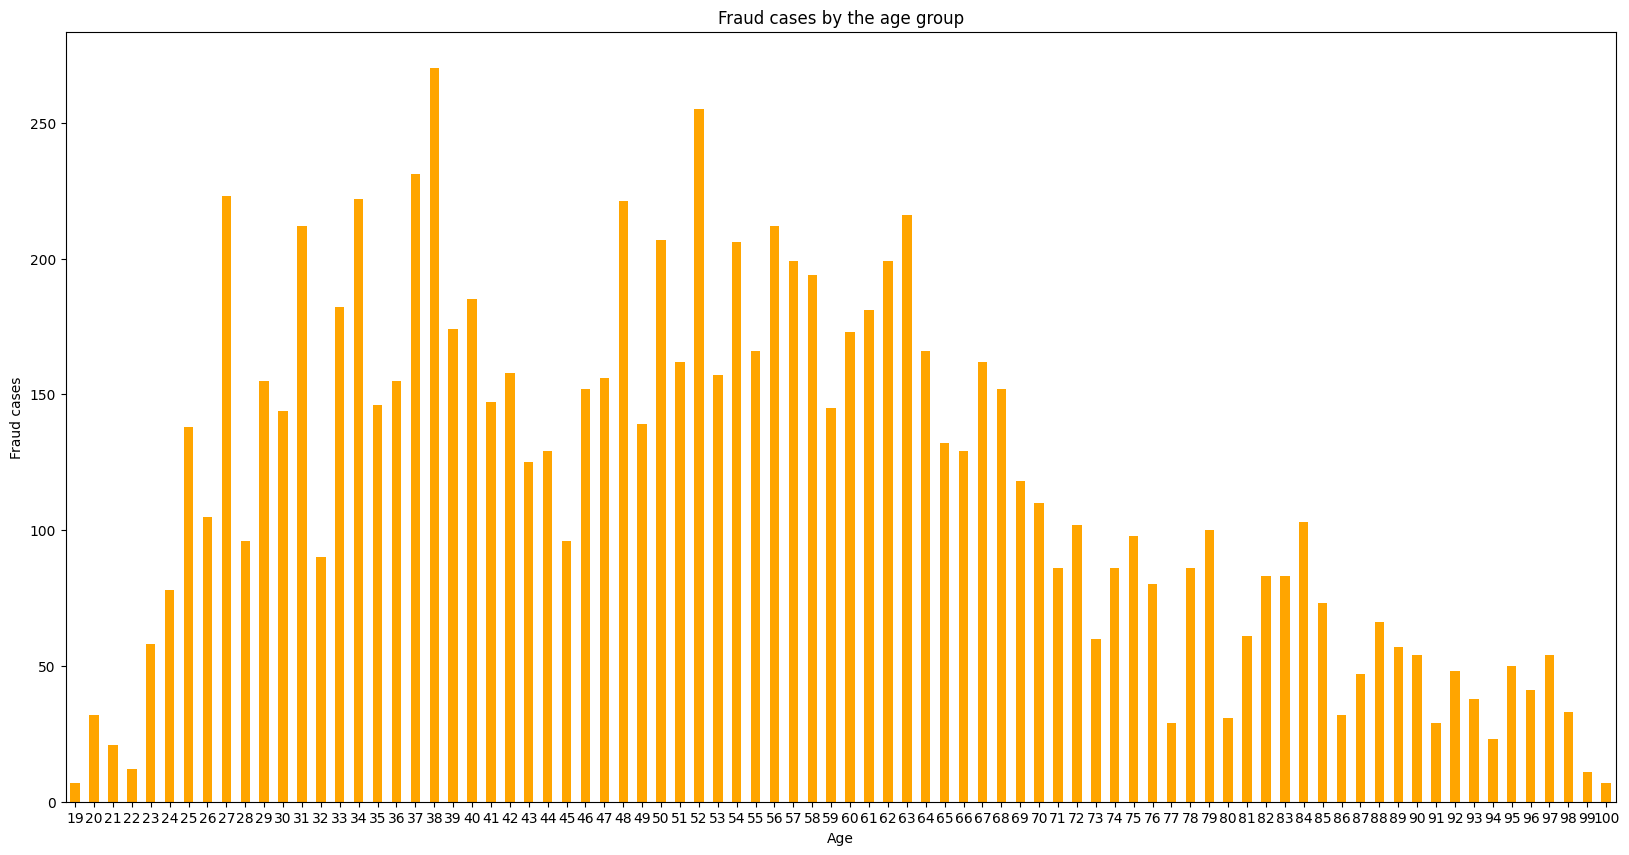

In [18]:
plt.figure(figsize=(20, 10))

fraudalent_cases = df_bal[df_bal['is_fraud'] == 1]

fraud_count_by_age = fraudalent_cases['age'].value_counts().sort_index()

xsub_plot = fraud_count_by_age.plot(kind='bar', color='orange')

xsub_plot.set_xlabel("Age")
xsub_plot.set_ylabel("Fraud cases")
xsub_plot.set_title("Fraud cases by the age group")

plt.xticks(rotation=0)

plt.show()

In [19]:
fraud_count_by_age.dtype

dtype('int64')

**4. Encoding data into decimal**

In [20]:
numeric_data = []

for col in df_bal.columns:
    if df_bal[col].dtype == 'int64' or df_bal[col].dtype == 'int32' or df_bal[col].dtype == 'float64':
        numeric_data.append(col)
        
categorical_data = []

for col in df_bal.columns:
    if df_bal[col].dtype == 'object':
        categorical_data.append(col)

In [21]:
print(numeric_data)
print(categorical_data)

['amt', 'zip', 'lat', 'long', 'city_pop', 'age', 'is_fraud']
['category', 'city', 'state']


In [22]:
from sklearn.preprocessing import LabelEncoder, StandardScaler

encoder = LabelEncoder()

for col in categorical_data:
    df_bal[col] = encoder.fit_transform(df_bal[col])

In [23]:
df_bal

,category,amt,city,state,zip,lat,long,city_pop,age,is_fraud
2449,4,281.06,165,27,28611,35.9946,-81.7266,885,36,1
2472,2,11.52,733,43,78208,29.4400,-98.4590,1595797,64,1
2523,4,276.31,733,43,78208,29.4400,-98.4590,1595797,64,1
2546,2,7.03,165,27,28611,35.9946,-81.7266,885,36,1
2553,4,275.73,733,43,78208,29.4400,-98.4590,1595797,64,1
...,...,...,...,...,...,...,...,...,...,...
99709,2,62.58,392,40,29455,32.8357,-79.8217,20478,27,0
274694,8,273.25,61,34,14711,42.3200,-78.0943,1766,62,0
807093,9,2.74,305,48,53129,42.9373,-87.9943,13973,43,0
861157,11,161.28,880,17,40077,38.4921,-85.4524,564,28,0


In [24]:
X = df_bal.columns.difference(df_bal['is_fraud'])

In [30]:
columns = df_bal.columns.tolist()
columns.remove('is_fraud')

X = df_bal.drop(['is_fraud'], axis=1)
y = df_bal['is_fraud']

In [32]:
X

,category,amt,city,state,zip,lat,long,city_pop,age
2449,4,281.06,165,27,28611,35.9946,-81.7266,885,36
2472,2,11.52,733,43,78208,29.4400,-98.4590,1595797,64
2523,4,276.31,733,43,78208,29.4400,-98.4590,1595797,64
2546,2,7.03,165,27,28611,35.9946,-81.7266,885,36
2553,4,275.73,733,43,78208,29.4400,-98.4590,1595797,64
...,...,...,...,...,...,...,...,...,...
99709,2,62.58,392,40,29455,32.8357,-79.8217,20478,27
274694,8,273.25,61,34,14711,42.3200,-78.0943,1766,62
807093,9,2.74,305,48,53129,42.9373,-87.9943,13973,43
861157,11,161.28,880,17,40077,38.4921,-85.4524,564,28


In [39]:
scaler = StandardScaler()

X[columns] = scaler.fit_transform(X[columns])
# Changing all columns but is_fraud
df_bal[X.columns] = X

In [40]:
df_bal

,category,amt,city,state,zip,lat,long,city_pop,age,is_fraud
2449,-0.709574,-0.048824,-1.077481,0.034310,-0.745892,-0.510595,0.611576,-0.291727,-0.891598,1
2472,-1.225613,-0.766329,1.084657,1.152756,1.087702,-1.789179,-0.575843,4.991972,0.660956,1
2523,-0.709574,-0.061468,1.084657,1.152756,1.087702,-1.789179,-0.575843,4.991972,0.660956,1
2546,-1.225613,-0.778281,-1.077481,0.034310,-0.745892,-0.510595,0.611576,-0.291727,-0.891598,1
2553,-0.709574,-0.063012,1.084657,1.152756,1.087702,-1.789179,-0.575843,4.991972,0.660956,1
...,...,...,...,...,...,...,...,...,...,...
99709,-1.225613,-0.630409,-0.213387,0.943047,-0.714690,-1.126791,0.746758,-0.226818,-1.390633,0
274694,0.322505,-0.069614,-1.473365,0.523630,-1.259773,0.723280,0.869343,-0.288808,0.550060,0
807093,0.580524,-0.789701,-0.544559,1.502270,0.160535,0.843695,0.166787,-0.248368,-0.503459,0
861157,1.096564,-0.367673,1.644225,-0.664718,-0.321996,-0.023416,0.347174,-0.292790,-1.335184,0


**5. Model Building**

In [43]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB

In [47]:
X_train, y_train, X_test, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [60]:
models = {
    'LogisticRegression': LogisticRegression(),
    'DecisionTreeClassifier': DecisionTreeClassifier(),
    'RandomForestClassifier': RandomForestClassifier(),
    'GradientBoostingClassifier': GradientBoostingClassifier(),
    'AdaBoostClassifier': AdaBoostClassifier(),
    'Support vector machine': SVC(),
    'KNeighborsClassifier': KNeighborsClassifier(),
    'GaussianNB': GaussianNB(),
}

In [62]:
def classifier_trainer(model, X_train, y_train, X_test, y_test):
    model.fit(X_train, y_train)
    
    prediction = model.predict(X_test)
    
    accuracy = accuracy_score(y_test, prediction)
    precision = precision_score(y_test, prediction)
    
    recall = recall_score(y_test, prediction)
    f1 = f1_score(y_test, prediction)
    
    return accuracy, precision, recall, f1

In [63]:
accuracy_scores = []
precision_scores = []
recall_scores = []
f1_scores = []

for model_name, model in models.items():
    accuracy, precision, recall, f1 = classifier_trainer(model, X_train, X_test, y_train, y_test)
    
    print("For:", model_name)
    print("Accuracy score:", accuracy)
    print("Precision score:", precision)
    print("Recall score:", recall)
    print("f1 score:", f1)
    print("\n")
    
    accuracy_scores.append(accuracy)
    precision_scores.append(precision)
    recall_scores.append(recall)
    f1_scores.append(f1)

For: LogisticRegression
Accuracy score: 0.8536648536648537
Precision score: 0.9383033419023136
Recall score: 0.7568688439606014
f1 score: 0.8378766140602583


For: DecisionTreeClassifier
Accuracy score: 0.9492359492359492
Precision score: 0.9520083463745436
Recall score: 0.9460860549507517
f1 score: 0.9490379615184608


For: RandomForestClassifier
Accuracy score: 0.9595959595959596
Precision score: 0.9658434051497635
Recall score: 0.9528252980819077
f1 score: 0.9592901878914405


For: GradientBoostingClassifier
Accuracy score: 0.9461279461279462
Precision score: 0.9502878074306645
Recall score: 0.9414204250907205
f1 score: 0.9458333333333333




c:\Users\Aditya Lohia\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


For: AdaBoostClassifier
Accuracy score: 0.915047915047915
Precision score: 0.9269333333333334
Recall score: 0.9009849663037843
f1 score: 0.9137749737118822


For: Support vector machine
Accuracy score: 0.8632478632478633
Precision score: 0.9673115410273516
Recall score: 0.751684810782789
f1 score: 0.8459743290548425


For: KNeighborsClassifier
Accuracy score: 0.8365708365708365
Precision score: 0.880868544600939
Recall score: 0.7781233799896319
f1 score: 0.8263143407652078


For: GaussianNB
Accuracy score: 0.8031598031598032
Precision score: 0.9642573471008737
Recall score: 0.6293416277864178
f1 score: 0.7616060225846926




## LabelEncoder -> StandardScaler -> RandomForestClassifier